In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download SPY data
spy = yf.download("SPY", start="2015-01-01", progress=False)

# Flatten columns just in case
if isinstance(spy.columns, pd.MultiIndex):
    spy.columns = spy.columns.get_level_values(0)

# Name the index
spy.index.name = "Date"

spy.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,170.589584,171.793678,169.551581,171.378477,121465900
2015-01-05,167.508835,169.709397,167.201590,169.543319,169632600
2015-01-06,165.931061,168.339223,165.133869,167.816066,209151400
2015-01-07,167.998795,168.339263,166.811325,167.259737,125346700
2015-01-08,170.979919,171.195832,169.393860,169.410459,147217800


In [2]:
spy.to_csv("../data/spy_prices.csv")

In [3]:
df = pd.read_csv("../data/spy_prices.csv", index_col="Date", parse_dates=True)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,170.589584,171.793678,169.551581,171.378477,121465900
2015-01-05,167.508835,169.709397,167.201590,169.543319,169632600
2015-01-06,165.931061,168.339223,165.133869,167.816066,209151400
2015-01-07,167.998795,168.339263,166.811325,167.259737,125346700
2015-01-08,170.979919,171.195832,169.393860,169.410459,147217800


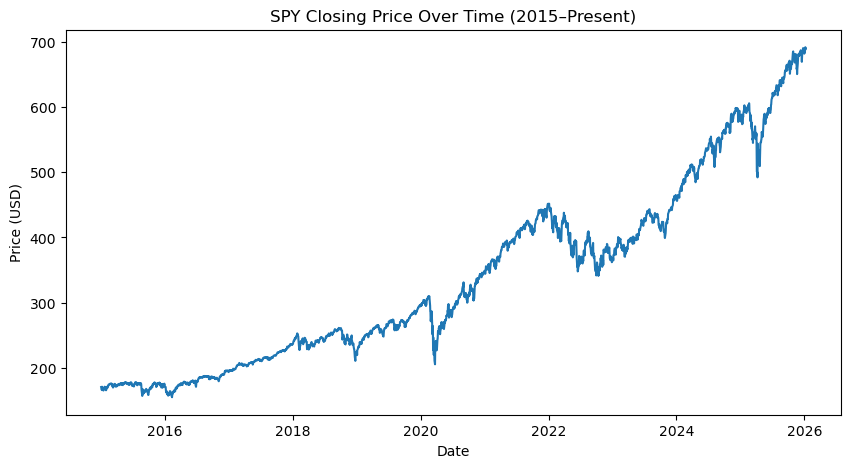

In [4]:
plt.figure(figsize=(10,5))
plt.plot(df["Close"])
plt.title("SPY Closing Price Over Time (2015–Present)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.savefig("../visuals/spy_price_trend.png", bbox_inches="tight")
plt.show()

The SPY ETF demonstrates a strong long-term upward trend since 2015, interrupted by periods of sharp drawdowns during market stress. Despite short-term volatility, the market consistently recovers, highlighting the resilience of broad U.S. equity markets.

In [6]:
df["daily_return"] = df["Close"].pct_change()
df[["Close", "daily_return"]].head()

,Close,daily_return
Date,,
2015-01-02,170.589584,NaN
2015-01-05,167.508835,-0.018059
2015-01-06,165.931061,-0.009419
2015-01-07,167.998795,0.012461
2015-01-08,170.979919,0.017745


In [7]:
df["daily_return"].describe()

count    2770.000000
mean        0.000567
std         0.011199
min        -0.109424
25%        -0.003691
50%         0.000645
75%         0.005929
max         0.105019
Name: daily_return, dtype: float64

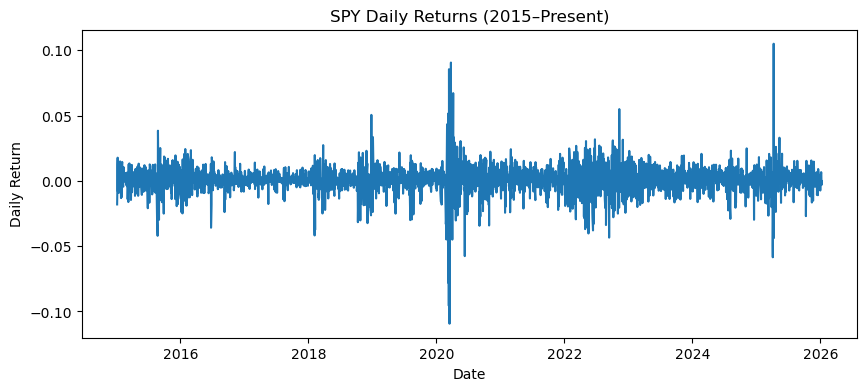

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df["daily_return"])
plt.title("SPY Daily Returns (2015–Present)")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

Volatility = standard deviation of returns.

In [10]:
df["volatility_30d"] = df["daily_return"].rolling(30).std() * (252 ** 0.5)  # annualized
df[["daily_return", "volatility_30d"]].tail()

,daily_return,volatility_30d
Date,,
2026-01-02,0.001833,0.106717
2026-01-05,0.006660,0.107612
2026-01-06,0.005947,0.096114
2026-01-07,-0.003223,0.094282
2026-01-08,-0.000102,0.085803


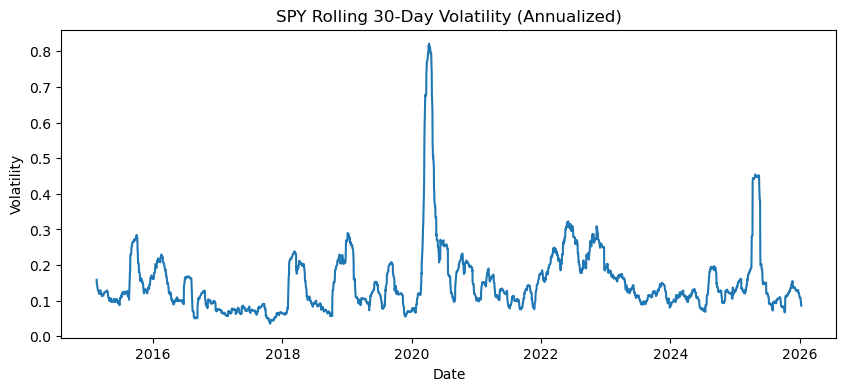

In [11]:
plt.figure(figsize=(10,4))
plt.plot(df["volatility_30d"])
plt.title("SPY Rolling 30-Day Volatility (Annualized)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.savefig("../visuals/spy_volatility.png", bbox_inches="tight")
plt.show()

Insight (returns):
SPY daily returns cluster around small positive/negative changes most of the time, with occasional extreme spikes. 
This pattern reflects stable day-to-day movements punctuated by short periods of market stress.

Insight (risk):
Rolling volatility increases sharply during market shocks and gradually declines during stable periods. 
This highlights that risk is not constant over time, and short-term market uncertainty can rise quickly.

In [14]:
df[["daily_return", "volatility_30d"]].isna().sum()

daily_return       1
volatility_30d    30
dtype: int64

cumulative returns

In [16]:
df["cumulative_return"] = (1 + df["daily_return"]).cumprod()

rolling peak

In [18]:
df["rolling_peak"] = df["cumulative_return"].cummax()

drawdown 

In [20]:
df["drawdown"] = (df["cumulative_return"] - df["rolling_peak"]) / df["rolling_peak"]

find max drawdown

In [22]:
max_drawdown = df["drawdown"].min()
max_drawdown

-0.3371725431713012

Insight :
The maximum drawdown of approximately -33.7% highlights the extent of downside risk in broad equity markets during periods of severe stress. 

While SPY demonstrates strong long-term growth, this metric emphasizes that investors must be able to tolerate substantial temporary losses to benefit from long-term returns.

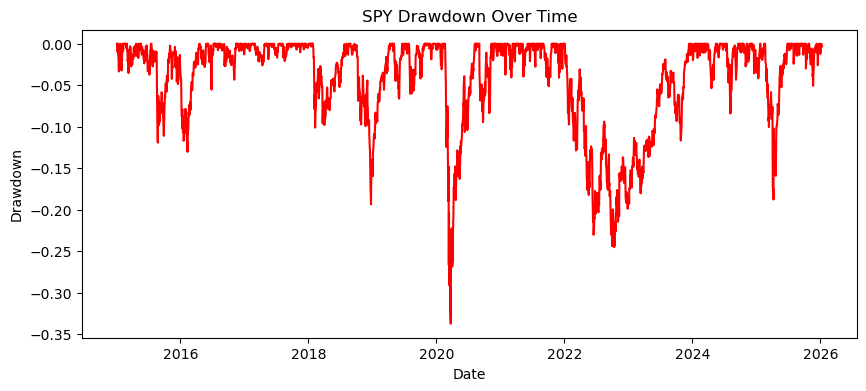

In [25]:
plt.figure(figsize=(10,4))
plt.plot(df["drawdown"], color="red")
plt.title("SPY Drawdown Over Time")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.savefig("../visuals/spy_drawdown.png", bbox_inches="tight")
plt.show()

The maximum drawdown highlights the largest peak-to-trough loss experienced by SPY over the period. This measure captures downside risk more intuitively than volatility, reflecting the potential loss an investor could face during severe market downturns.

In [27]:
#Moving Average 

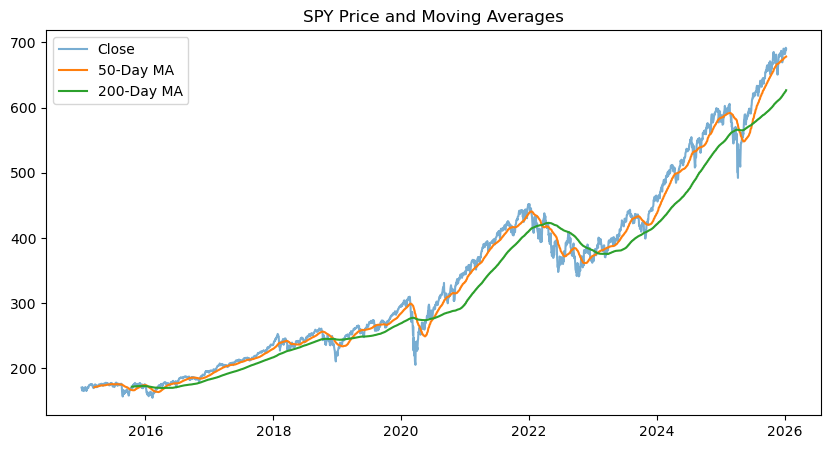

In [28]:
df["MA_50"] = df["Close"].rolling(50).mean()
df["MA_200"] = df["Close"].rolling(200).mean()

plt.figure(figsize=(10,5))
plt.plot(df["Close"], alpha=0.6, label="Close")
plt.plot(df["MA_50"], label="50-Day MA")
plt.plot(df["MA_200"], label="200-Day MA")
plt.legend()
plt.title("SPY Price and Moving Averages")
plt.show()

Insight
Short-term trend indicators respond faster to price changes, while long-term moving averages smooth out noise. Crossovers tend to coincide with broader market regime shifts rather than precise timing signals.

In [30]:
#30-day rolling average forecast

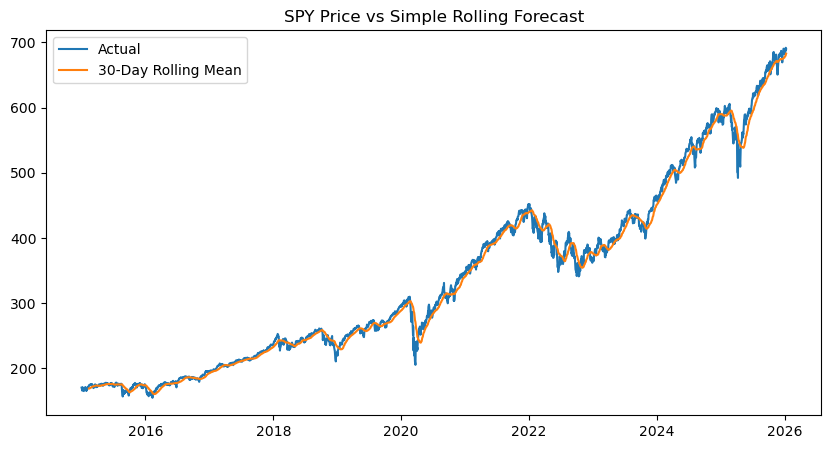

In [31]:
df["forecast_30d"] = df["Close"].rolling(30).mean()

plt.figure(figsize=(10,5))
plt.plot(df["Close"], label="Actual")
plt.plot(df["forecast_30d"], label="30-Day Rolling Mean")
plt.legend()
plt.title("SPY Price vs Simple Rolling Forecast")
plt.show()

This baseline forecast smooths recent price movements and provides a reference trend rather than precise predictions. It is most useful for contextualizing recent performance, not for short-term market timing.

In [33]:
#INTERPRETATION 

Limitations & Assumptions

This analysis relies solely on historical price data and assumes that past patterns provide insight into potential future behavior.

Volatility and drawdown metrics describe risk but do not predict the timing or magnitude of future market shocks.

The forecasting approach used is intentionally simple and serves as a baseline reference rather than a precise predictive model.

Transaction costs, dividends, taxes, and macroeconomic factors are not incorporated into this analysis.
